X digits : [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y digits : [0 1 2 ... 8 9 8]
X digits shape : (1797, 64)
y digits shape: (1797,)


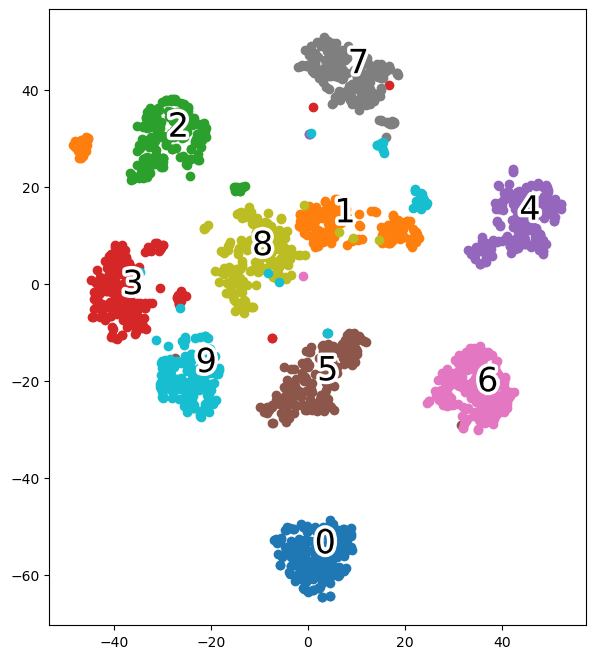

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

y_digits=digits.target
X_digits=digits.data
print(f'X digits : {X_digits}')
print(f'y digits : {y_digits}')
print(f'X digits shape : {X_digits.shape}')
print(f'y digits shape: {y_digits.shape}')

# 비선형 차원 축소
from sklearn.manifold import TSNE

tsme=TSNE(
    n_components=2 # 64 차원 데이터셋을 2차원 공간에 투영
    ,init='pca'
    ,random_state=123
)

# 투영 : 변환
X_digits_tmse=tsme.fit_transform(X_digits)

import matplotlib.patheffects as PathEffects


def plot_projection(x, colors):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])

plot_projection(X_digits_tmse, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()